In [ ]:
# Requirements, will skip if already installed
%pip install geopandas rasterio rasterstats shapely
%pip install folium earthengine-api
%pip install scikit-learn
%pip install treeinterpreter

In [4]:
!pip install -q geopandas shapely scikit-learn treeinterpreter rasterio rasterstats folium 

In [5]:
%matplotlib inline
import os 
from os import makedirs, path as op
import matplotlib
import numpy as np
import rasterio
import geopandas as gpd
import pandas as pd
import shapely
import folium
import os
import pandas as pd
import numpy as np
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import json
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from os import path as op
import pickle
import geopandas as gpd
import shapely as shp
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.features import rasterize
from rasterstats.io import bounds_window
import rasterstats
import folium
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from treeinterpreter import treeinterpreter as ti

 Folow [this](https://developmentseed.org/sat-ml-training/GettingStarted#Explore-your-drive) for gogle drive issue

Importing a library that is not in Colaboratory

In [ ]:
#!pip install matplotlib-venn
#import matplotlib-venn

In [ ]:
#!apt-get -qq install -y libfluidsynth1
#import libfluidsynth1

Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
#!pip install mapclassify
#import mapclassify

In [ ]:
!pip install folium matplotlib mapclassify

In [ ]:
#import os
#os.chdir("/content/drive/My Drive")
#!ls

In [ ]:
!pip install awscli

In [6]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
my_root_dir = "/content/drive/My Drive/Colab Notebooks/data"

Mounted at /content/drive/


# Read Data

In [7]:
data_dir = Path("/content/drive/MyDrive/Colab Notebooks/data")
# data_dir= Path("/content/sample_data/cropdataset")
cereal = pd.read_csv(data_dir / 'cereal_crop_climate2006-2021.csv',encoding='latin-1')
#cereal = pd.read_csv(my_root_dir, 'cereal_crop_climate2006-2021.csv')
print("=== cereal === ")
print(cereal.columns)

=== cereal === 
Index(['City', 'Type_crop', 'Year', 'Production_tonnes', 'PS', 'TS', 'QV2M',
       'RH2M', 'WS2M', 'GWETTOP', 'T2M_MAX', 'T2M_MIN', 'GWETPROF', 'GWETROOT',
       'CLOUD_AMT', 'T2M_RANGE', 'PRECTOTCORR', 'Fertilizers_tonnes', 'lat',
       'lon'],
      dtype='object')


In [14]:
cereal.head()

,City,Type_crop,Year,Production_tonnes,PS,TS,QV2M,RH2M,WS2M,GWETTOP,T2M_MAX,T2M_MIN,GWETPROF,GWETROOT,CLOUD_AMT,T2M_RANGE,PRECTOTCORR,Fertilizers_tonnes,lat,lon
0,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,24.23,1.0,0.61,0.61,58.07,23.23,1.79,122.7,42.1833,14.5333
1,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,24.23,1.0,0.61,0.61,58.07,23.23,1.79,1124.5,42.1833,14.5333
2,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,24.23,1.0,0.61,0.61,58.07,23.23,1.79,16166.9,42.1833,14.5333
3,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,24.23,1.0,0.61,0.61,58.07,23.23,1.79,13448.7,42.1833,14.5333
4,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,24.23,1.0,0.61,0.61,58.07,23.23,1.79,934.7,42.1833,14.5333


# **# Turn the pandas dataframe into geopandas dataframe**

In [8]:
cereal_gpd = gpd.GeoDataFrame(cereal, geometry=gpd.points_from_xy(cereal.lon,cereal.lat))
cereal_gpd.head()

,City,Type_crop,Year,Production_tonnes,PS,TS,QV2M,RH2M,WS2M,GWETTOP,...,T2M_MIN,GWETPROF,GWETROOT,CLOUD_AMT,T2M_RANGE,PRECTOTCORR,Fertilizers_tonnes,lat,lon,geometry
0,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,122.7,42.1833,14.5333,POINT (14.53330 42.18330)
1,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,1124.5,42.1833,14.5333,POINT (14.53330 42.18330)
2,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,16166.9,42.1833,14.5333,POINT (14.53330 42.18330)
3,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,13448.7,42.1833,14.5333,POINT (14.53330 42.18330)
4,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,934.7,42.1833,14.5333,POINT (14.53330 42.18330)


# Transform geopanda dataframe as shape and geoJonson File


In [9]:
cereal_gpd.to_file("cereal_gpd.shp")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [9]:
cereal_gpd.to_file('cereal.geojson', driver='GeoJSON')

In [10]:
df_place =gpd.read_file('cereal.geojson')

In [18]:
df_place.shape

(208499, 21)

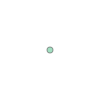

In [67]:
df_place['geometry'][0]

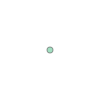

In [68]:
df_place['geometry'][6]

In [69]:
df_place['geometry']

0         POINT (14.53330 42.18330)
1         POINT (14.53330 42.18330)
2         POINT (14.53330 42.18330)
3         POINT (14.53330 42.18330)
4         POINT (14.53330 42.18330)
                    ...            
208494    POINT (11.11670 46.06670)
208495    POINT (11.11670 46.06670)
208496    POINT (11.11670 46.06670)
208497    POINT (11.11670 46.06670)
208498    POINT (11.11670 46.06670)
Name: geometry, Length: 208499, dtype: geometry

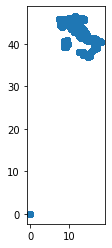

In [70]:
#Examine entire geometry of a column
df_place.plot()

Create place holder variable

- Creation of place holder variables is to represnt the false potive count that will be genarated in prediction process
- They, however, help at this moment to see the visulizaton  

In [9]:
# forst r line of the code create a new column of full of 0 values
# second line of the code replaces the first 2000 rows with 
# random  number between 1 and 7
df_place ['Count_placeholder'] = 0
df_place ['Count_placeholder'] [:2000] =np.random.randint(7,size=2000)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


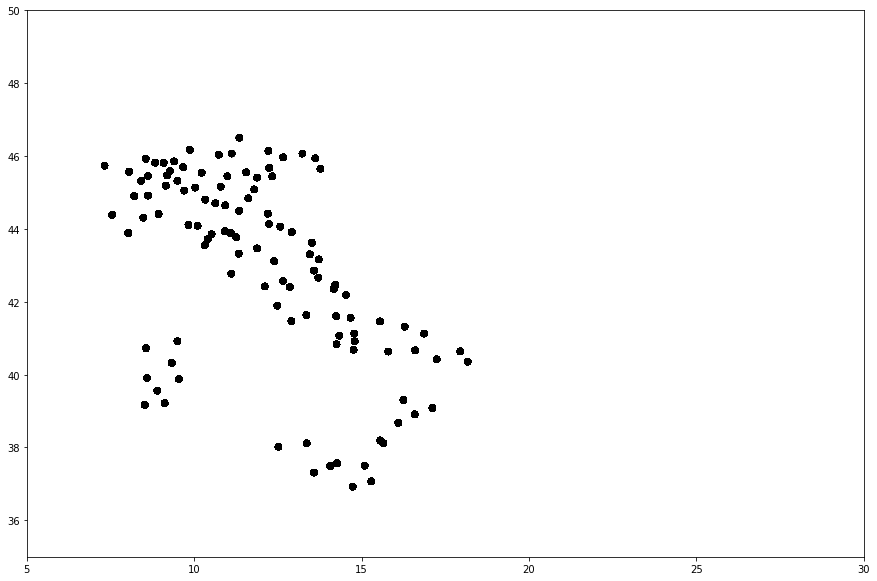

In [10]:
f,ax=plt.subplots(1,figsize=(15,15))
ax=df_place.plot(column ='Count_placeholder', cmap= 'afmhot',ax=ax)
ax.set_xlim([5,30])
ax.set_ylim([35,50])
plt.show()

In [22]:
df_place.columns

Index(['City', 'Type_crop', 'Year', 'Production_tonnes', 'PS', 'TS', 'QV2M',
       'RH2M', 'WS2M', 'GWETTOP', 'T2M_MAX', 'T2M_MIN', 'GWETPROF', 'GWETROOT',
       'CLOUD_AMT', 'T2M_RANGE', 'PRECTOTCORR', 'Fertilizers_tonnes', 'lat',
       'lon', 'geometry', 'Count_placeholder'],
      dtype='object')

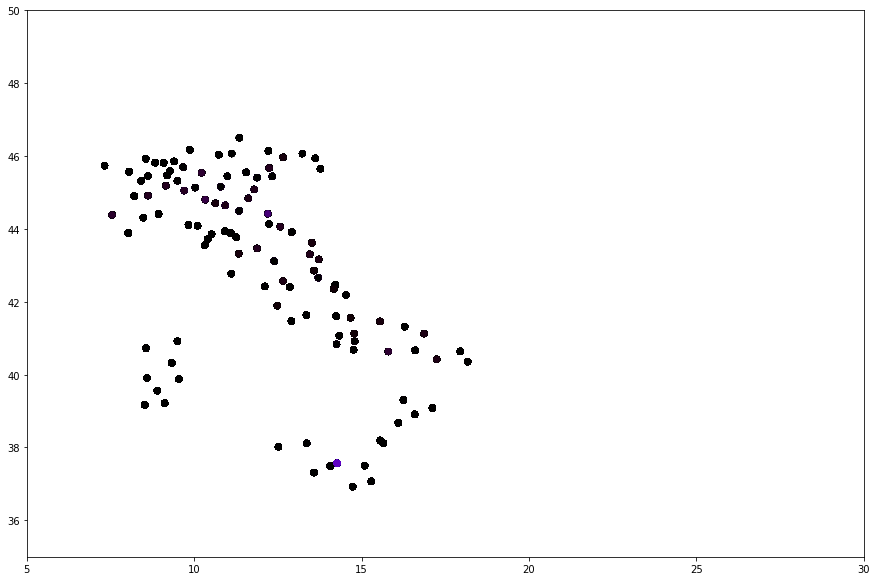

In [23]:
# with 'target_2' as column value of 0 and 1
f,ax=plt.subplots(1,figsize=(15,15))
ax=df_place.plot(column ='Production_tonnes', cmap= 'gnuplot',ax=ax)
ax.set_xlim([5,30])
ax.set_ylim([35,50])
plt.show()

In [11]:
cereal_gpd.crs

In [12]:
cereal_gpd.crs is None

True

In [11]:
cereal_gpdf = cereal_gpd.set_crs('epsg:3857')

In [ ]:
cereal_gpdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

From available ploting tool of geopandas dataframe `geoplot` is most common

In [ ]:
#!pip install geoplot

In [12]:
import geoplot
import geoplot.crs as gcrs


In [ ]:
#!pip uninstall shapely
#!pip install shapely --no-binary shapely

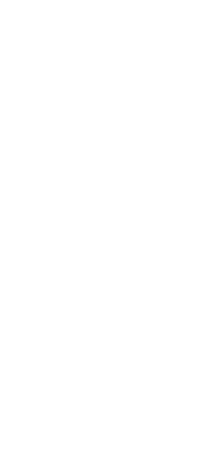

In [14]:
geoplot.polyplot(cereal_gpdf,projection=gcrs.AlbersEqualArea(),edgecolor='darkgrey',
                facecolor='lightgrey',linewidth=.3,figsize=(12,8))

In [ ]:
# from available ploting tool of geopandas dataframe

#Overriding existing CRS

In [ ]:
cereal_gpd.set_crs(4326, allow_override=True)

In [ ]:
#!pip install folium matplotlib mapclassify

In [ ]:
#!pip install libpysal

In [ ]:
# interactive maping  using explore
import libpysal
import geopandas as gpd
import mapclassify
cereal_gpd.explore("Type_crop", cmap="Blues") 

In [ ]:
mapclassify.__version__

'2.4.3'

In [ ]:
pth = Path('/content/cereal_gpd.shp')
gdf = gpd.read_file(pth)

In [ ]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
sf = shp.Reader("/content/cereal_gpd.shp")

plt.figure()
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
plt.show()

In [ ]:
!pip install pyshp

In [ ]:
import matplotlib.pyplot as plt
import shapefile   

shpFilePath = "/content/cereal_gpd.shp"  
listx=[]
listy=[]
test = shapefile.Reader(shpFilePath)
for sr in test.shapeRecords():
    for xNew,yNew in sr.shape.points:
        listx.append(xNew)
        listy.append(yNew)
plt.plot(listx,listy)
plt.show()

In [ ]:
import matplotlib.pyplot as plt 
#from descartes import PointPatch 
from shapely.geometry import Point
poly = cereal_gpd['geometry']
print(poly)

0         POINT (14.533 42.183)
1         POINT (14.533 42.183)
2         POINT (14.533 42.183)
3         POINT (14.533 42.183)
4         POINT (14.533 42.183)
                  ...          
208494    POINT (11.117 46.067)
208495    POINT (11.117 46.067)
208496    POINT (11.117 46.067)
208497    POINT (11.117 46.067)
208498    POINT (11.117 46.067)
Name: geometry, Length: 208499, dtype: geometry


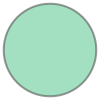

In [ ]:
patch = Point(14.533, 42.183).buffer(10.0)
patch

In [ ]:
patch.area

313.65484905459397

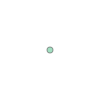

In [ ]:
import json
from shapely.geometry import mapping, shape
s = shape(json.loads('{"type": "Point", "coordinates": [14.533, 42.183]}'))
s

In [ ]:
print(json.dumps(mapping(s)))

{"type": "Point", "coordinates": [14.533, 42.183]}


In [ ]:
cereal_gpd.explore("Type_crop", cmap="Blues") 

Read the Geojson Data as traing set

In [17]:
# read in training data polygons that created as geojson from a shared directory
training_data = '/content/cereal.geojson'
training_vectors = gpd.read_file(training_data)

# make a bounding box and centroid for mapping
bbox = training_vectors.total_bounds
center = shp.geometry.box(bbox[0], bbox[1], bbox[2], bbox[3]).centroid

# show the 1st 5 lines
training_vectors.head()

,City,Type_crop,Year,Production_tonnes,PS,TS,QV2M,RH2M,WS2M,GWETTOP,...,T2M_MIN,GWETPROF,GWETROOT,CLOUD_AMT,T2M_RANGE,PRECTOTCORR,Fertilizers_tonnes,lat,lon,geometry
0,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,122.7,42.1833,14.5333,POINT (14.53330 42.18330)
1,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,1124.5,42.1833,14.5333,POINT (14.53330 42.18330)
2,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,16166.9,42.1833,14.5333,POINT (14.53330 42.18330)
3,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,13448.7,42.1833,14.5333,POINT (14.53330 42.18330)
4,Torino,common wheat,2006,119700.0,93.51,10.72,6.16,64.9,1.33,0.62,...,1.0,0.61,0.61,58.07,23.23,1.79,934.7,42.1833,14.5333,POINT (14.53330 42.18330)


# Reading imagery from Google Earth Engine (GEE)

- this application of  Google Earth Engine is to select and filter Satellite imagery that we will classify with the training data.

- For Notbook other than colabs authonetication is only one per week 

- After connecting GEE the next step is to search imagnry data



#  Connect GEE

In [15]:
# If not on Colab you'll need install the earth-engine Python API
#!pip install earthengine-api #earth-engine Python API
# Athenticate to your GEE account. 
!earthengine authenticate
import ee 
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=dbQOxnRvfF99KLm6j2D5xblx2V9FRFaRWwC4sGX2_wI&tc=TtBsmgki7YSsa5dCG6au2QDeerhTm8bABMFmFoLoHs4&cc=lVl0_a0BUVDLWhOaN0qh03z6J4ZQT1uQAUkl43aubGk

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AfgeXvugYrIaxJcTpoV2LeES5CAm2QWz90IrdeyoyCJWuayRazN_os6ypVA

Successfully saved authorization token.


## Search GEE data

- We search fo Sentinel 2 imagery, a multispectral satellite with ~10m resolution and repeat coverage every 5 days.

- Filters will include selecting bands, a date range, and only imagery within a defined Area of Interest (AOI).

In [18]:
# From GEE
#training_vectors.total_bounds.tolist()
aoi = ee.Geometry.Rectangle(training_vectors.total_bounds.tolist())
band_sel = ('B2', 'B3', 'B4', 'B8', 'B11', 'B12')

sentinel_scenes = ee.ImageCollection("COPERNICUS/S2")\
    .filterBounds(aoi)\
    .filterDate('2019-05-02', '2019-05-03')\
    .select(band_sel)

scenes = sentinel_scenes.getInfo()
[print(scene['id']) for scene in scenes["features"]]

sentinel_mosaic = sentinel_scenes.mean().rename(band_sel)

sentinel_mosaic.getInfo()

COPERNICUS/S2/20190502T093041_20190502T093541_T32PPR
COPERNICUS/S2/20190502T093041_20190502T093541_T32PPS
COPERNICUS/S2/20190502T093041_20190502T093541_T32PQA
COPERNICUS/S2/20190502T093041_20190502T093541_T32PQB
COPERNICUS/S2/20190502T093041_20190502T093541_T32PQR
COPERNICUS/S2/20190502T093041_20190502T093541_T32PQS
COPERNICUS/S2/20190502T093041_20190502T093541_T32PQT
COPERNICUS/S2/20190502T093041_20190502T093541_T32PQU
COPERNICUS/S2/20190502T093041_20190502T093541_T32PQV
COPERNICUS/S2/20190502T093041_20190502T093541_T32PRA
COPERNICUS/S2/20190502T093041_20190502T093541_T32PRB
COPERNICUS/S2/20190502T093041_20190502T093541_T32PRC
COPERNICUS/S2/20190502T093041_20190502T093541_T32PRQ
COPERNICUS/S2/20190502T093041_20190502T093541_T32PRR
COPERNICUS/S2/20190502T093041_20190502T093541_T32PRS
COPERNICUS/S2/20190502T093041_20190502T093541_T32PRT
COPERNICUS/S2/20190502T093041_20190502T093541_T32PRU
COPERNICUS/S2/20190502T093041_20190502T093541_T32PRV
COPERNICUS/S2/20190502T093041_20190502T093541_

{'type': 'Image',
 'bands': [{'id': 'B2',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B3',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B4',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B8',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B11',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'min': 0,
    'max': 65535},
   'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0]},
  {'id': 'B12',
   'data_type': {'type': 'PixelType',
    'precision': 'double',
    'm

# Display GEE objects using folium.

In [19]:
# To make a map we first need some helper functions

# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'

#@title Mapdisplay: Display GEE objects using folium.
def Mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if gpd.geodataframe.GeoDataFrame == type(v):
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz) 
      elif ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz

In [21]:
s2_vis_params = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 3000,
}

Mapdisplay(center=[center.y, center.x],
           dicc={'S2':sentinel_mosaic.getMapId(s2_vis_params),
                 'TrainingData':training_vectors}, 
           zoom_start=12)

# Exporting Image as GeoTiff and save in the drive
- Since our analysis method  will happen outside of GEE, we will be exporting the search results to a Cloud Optimized Geotiff,

- Geotiff is a common GIS format for rasters data.

In [51]:
from IPython.core.display import Image
# We will save it to Google Drive for later reuse
raster_name = op.join(data_dir,"Sentinel_mosaic-Milan_Italy")
saver = Image.Saver()
save_path =saver.save(session,"data/mosaic.tf")
print('done saving at',save_path)

In [52]:
# Export the image, specifying scale and region.
# Warning, This specific export takes at least 1 hour, and 700+ MB
# There may be a bug here, not sure GEE export can write to a folder beyond depth 1 in a google drive
task = ee.batch.Export.image.toDrive(**{
    'image': sentinel_mosaic,
    'description': 'Milan_Italy_2019',
    'folder': my_root_dir,
    'fileNamePrefix':raster_name,
    'scale': 10,
    'region': aoi,
    'crs': 'EPSG:4326',
    'fileFormat': 'GeoTIFF',
    'formatOptions': {
      'cloudOptimized': 'true'
    },
})

# This task will run in the background even if you close this notebook.
# You can also check on the status of the task through the Javascript GEE interface
# https://code.earthengine.google.com
task.start()

In [53]:
# If you want to keep track of the export you can run this code
# However if run this, you will need to wait for it to finish before running additional code

import time 
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

Polling for task (id: KRUSQCQN5RUWBV32TDPR3LK6).


In [54]:
# Reference the raster on disk.
raster_path = op.join(my_root_dir, raster_name)
raster_file = ".".join([raster_path, "tif"])
# Alternate reference already prepared file on Google Drive, uncomment next line to use
#raster_file = '/content/drive/Shared drives/servir-sat-ml/data/Trans_nzoia_2019_05-02.tif'

print(raster_file)

/content/drive/MyDrive/Colab Notebooks/data/Sentinel_mosaic-Milan_Italy.tif


# Model training

- Lets  traine a model to identify classes of land use based on the training data and the satellite imagery

## Prepare Data

- First do some preparation to organize the training data into the correct python types, and to extract sample pixels from the intersecting imagery.

In [55]:
# find all unique values of training data names to use as classes
classes = np.unique(training_vectors.Type_crop)
classes

array(['0', 'barley', 'broad bean', 'chick-peas',
       'common spring wheat and spelt', 'common wheat',
       'common winter wheat and spelt', 'dried kidney bean',
       'durum wheat', 'early potatoes', 'grain maize', 'grain pea',
       'lentil', 'oats',
       'oats and spring cereal mixtures (mixed grain other than maslin)',
       'other cereals', 'potatoes', 'protein pea', 'rice', 'rye',
       'rye and winter cereal mixtures (maslin)', 'sorghum',
       'spring barley',
       'spring cereal mixtures (mixed grain other than maslin)',
       'sugar beet', 'sweet lupin', 'sweet potatoes', 'titicale',
       'winter barley', 'winter cereal mixtures (maslin)'], dtype=object)

In [56]:
# create a dictionary to convert class names into integers for modeling
class_dict = dict(zip(classes, range(len(classes))))
class_dict   

{'0': 0,
 'barley': 1,
 'broad bean': 2,
 'chick-peas': 3,
 'common spring wheat and spelt': 4,
 'common wheat': 5,
 'common winter wheat and spelt': 6,
 'dried kidney bean': 7,
 'durum wheat': 8,
 'early potatoes': 9,
 'grain maize': 10,
 'grain pea': 11,
 'lentil': 12,
 'oats': 13,
 'oats and spring cereal mixtures (mixed grain other than maslin)': 14,
 'other cereals': 15,
 'potatoes': 16,
 'protein pea': 17,
 'rice': 18,
 'rye': 19,
 'rye and winter cereal mixtures (maslin)': 20,
 'sorghum': 21,
 'spring barley': 22,
 'spring cereal mixtures (mixed grain other than maslin)': 23,
 'sugar beet': 24,
 'sweet lupin': 25,
 'sweet potatoes': 26,
 'titicale': 27,
 'winter barley': 28,
 'winter cereal mixtures (maslin)': 29}

## Extracting values
- Lets loop through the training classes and their polygons reading the imagery raster extracting values.

In [57]:
# raster information
# a custom function for getting each value from the raster
def all_values(x):
    return x

# this larger cell reads data from a raster file for each training vector
X_raw = []
y_raw = []
with rasterio.open(raster_file, 'r') as src:
    for (label, geom) in zip(training_vectors.Type_crop, training_vectors.geometry):
        
        # read the raster data matching the geometry bounds
        window = bounds_window(geom.bounds, src.transform)
        # store our window information
        window_affine = src.window_transform(window)
        fsrc = src.read(window=window)
        # rasterize the geometry into the larger shape and affine
        mask = rasterize(
            [(geom, 1)],
            out_shape=fsrc.shape[1:],
            transform=window_affine,
            fill=0,
            dtype='uint8',
            all_touched=True
        ).astype(bool)
        
        # for each label pixel (places where the mask is true)
        label_pixels = np.argwhere(mask)
        
        for (row, col) in label_pixels:
            # add a pixel of data to X
            data = fsrc[:,row,col]
            one_x = np.nan_to_num(data, nan=1e-3)
            X_raw.append(one_x)
            # add the label to y
            y_raw.append(class_dict[label])

RasterioIOError: ignored

In [ ]:
# convert the training data lists into the appropriate numpy array shape and format for scikit-learn
X = np.array(X_raw)
y = np.array(y_raw)
(X.shape, y.shape)

# Calculayting some Indexs

- In addition to the raw pixel values we will calculated a couple of indices that help in some classifications.

- [Normalized Difference Vegetation Index (NDVI)]() - great for identiying photosynthesizing plants.
- [Normalized Difference Water Index (NDWI)]() - great for identifying open water 

In [ ]:
# helper function for calculating ND*I indices (bands in the final dimension)
def band_index(arr, a, b):
    return np.expand_dims((arr[..., a] - arr[..., b]) / (arr[..., a] + arr[..., b]), axis=1)

ndvi = band_index(X, 3, 2)
ndwi = band_index(X, 1, 3)

X = np.concatenate([X, ndvi, ndwi], axis=1)
X.shape

## Data spliting 

- split 20% of the data to reserve for testing the quality of the trained model.

In [ ]:
# split the data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Mode; Adjustment 

- Since traing data are same  for each class,calculate the relative quantities and tell the model so it can adjust to reduce bias

In [ ]:
# calculate class weights to allow for training on inbalanced training samples
labels, counts = np.unique(y_train, return_counts=True)
class_weight_dict = dict(zip(labels, 1 / counts))
class_weight_dict

# Train RandomForest

In [ ]:
 #initialize a RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=200,
    class_weight=class_weight_dict,
    max_depth=6,
    n_jobs=-1,
    verbose=1,
    random_state=0)


In [ ]:
# fit the model to the data (training)
clf.fit(X, y)

In [ ]:
# predict on X_test to evaluate the model
preds = clf.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=labels)

In [ ]:
# (optional) save the trained model as python pickle file
model_name = op.join(my_root_dir,'random_forest.sav')
with open(model_name, 'wb') as modelfile:
    pickle.dump(clf, modelfile)

### Assess the Model

- A confusion matrix shows a comparision between what the class is based on the test data, and what the model predicted it to be.

-  Low numbers are good.

-  The diagonal from top left to bottom right, is a class compared to itself should be high. Values range from 0 to 1.

In [ ]:
# plot the confusion matrix
%matplotlib inline
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Normalized Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

- we can see the most often confused classes are ----, ---, and ---.

In [ ]:
# predict again with the tree interpreter to see how much each band contributes to the classification
sample = 100
prediction, bias, contributions = ti.predict(clf, X_test[:sample])
c = np.sum(contributions, axis=0)

In [ ]:
# plot the contributions
band_names = ['Blue', 'Green', 'Red', 'NIR', 'SWIR1', 'SWIR2', 'NDVI', 'NDWI']

gdf = gpd.GeoDataFrame(c, columns=classes, index=band_names)
gdf.style.background_gradient(cmap='viridis')

# Using the Model

## Generate predictions over the full image

- since we've trained and tested the model over the existing data we can use the trained RandomForestClassifier `clf` over a whole satellite image that covers a larger geospatial location. 

- We can split the job into small tiles to optimize the compute power and potentially do the classification in parallel.

In [ ]:
# in this case, we predict over the entire input image
# (only small portions were used for training)
new_image = raster_file

# specify the output
output_image = op.join(my_root_dir, "classification.tif")

with rasterio.open(new_image, 'r') as src:
    profile = src.profile
    profile.update(
        dtype=rasterio.uint8,
        count=1,
    )
    with rasterio.open(output_image, 'w', **profile) as dst:

        # perform prediction on each small image patch to minimize required memory
        patch_size = 500

        for i in range((src.shape[0] // patch_size) + 1):
            for j in range((src.shape[1] // patch_size) + 1):
                # define the pixels to read (and write) with rasterio windows reading
                window = rasterio.windows.Window(
                    j * patch_size,
                    i * patch_size,
                    # don't read past the image bounds
                    min(patch_size, src.shape[1] - j * patch_size),
                    min(patch_size, src.shape[0] - i * patch_size))
                
                # read the image into the proper format
                data = src.read(window=window)
                
                # adding indices if necessary
                img_swp = np.moveaxis(data, 0, 2)
                img_flat = img_swp.reshape(-1, img_swp.shape[-1])

                img_ndvi = band_index(img_flat, 3, 2)
                img_ndwi = band_index(img_flat, 1, 3)

                img_w_ind = np.concatenate([img_flat, img_ndvi, img_ndwi], axis=1)

                # remove no data values, store the indices for later use
                m = np.ma.masked_invalid(img_w_ind)
                to_predict = img_w_ind[~m.mask].reshape(-1, img_w_ind.shape[-1])

                # skip empty inputs
                if not len(to_predict):
                    continue
                # predict
                img_preds = clf.predict(to_predict)

                # add the prediction back to the valid pixels (using only the first band of the mask to decide on validity)
                # makes the assumption that all bands have identical no-data value arrangements
                output = np.zeros(img_flat.shape[0])
                output[~m.mask[:, 0]] = img_preds.flatten()
                # resize to the original image dimensions
                output = output.reshape(*img_swp.shape[:-1])

                # create our final mask
                mask = (~m.mask[:, 0]).reshape(*img_swp.shape[:-1])

                # write to the final files
                dst.write(output.astype(rasterio.uint8), 1, window=window)
                dst.write_mask(mask, window=window)

## Make a Map

In [ ]:
### Visualize the results
import matplotlib.pyplot as plt
from rasterio.plot import show
%matplotlib inline

# Load the original image
# Load the classification

output_image = '/content/drive/MyDrive/Colab Notebooks/data/RF_classification.tif'

def linear_rescale(image, in_range=(0, 1), out_range=(1, 255)):
    imin, imax = in_range
    omin, omax = out_range
    image = np.clip(image, imin, imax) - imin
    image = image / np.float(imax - imin)
    return image * (omax - omin) + omin

with rasterio.open(output_image, 'r') as class_raster:
#  show(class_raster)
  classes = class_raster.read()

# Compare side by side
with rasterio.open(raster_file, 'r') as s2_raster:
#  show(s2_raster)
  s2 = s2_raster.read([1,2,3])
  for band in range(s2.shape[0]):
    s2[band] = linear_rescale(
            s2[band], 
            in_range=(0, 3000), 
            out_range=[0, 255]
        )
  s2 = s2.astype(np.uint8)
  #print(s2.shape)

fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(10, 4), sharey=True)
show(classes, transform=class_raster.transform, ax=ax1)
show(s2[[2,1,0], : , :], transform=s2_raster.transform, adjust='linear', ax=ax2)

You can also download and view the results in your favorite GIS application. There's a QGIS [style file](https://drive.google.com/file/d/1JMQWgqIediIRvEyNS3dwSkiELnC2HvVw/view?usp=sharing) in the Shared drive for visualizing.

In some cases imagery can often appear dark, you can check how well the data distribution spans the possible display values with a histogram. We applied a rescale function (just like we did when using Google Earth Engine earlier), in order to get a good RGB display of the imagery reflectance values.

This method can also be useful for exploring the distribution of classes in the model result.



In [ ]:
# Exploring why the imagery is so dark.
# Looks like it will need manual stretching to make a nice image
rasterio.plot.show_hist(s2, 
                   bins=50, 
                   histtype='stepfilled',
                   lw=0.0, 
                   stacked=False, 
                   alpha=0.3)